# EDA starts here - Ashna's code starts here 

Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Importing dataset

In [ ]:
df=pd.read_csv('China-CO2.csv')
df.head(10)

,year,co2,co2_growth_prct
0,1751,0.0,NaN
1,1752,0.0,NaN
2,1753,0.0,NaN
3,1754,0.0,NaN
4,1755,0.0,NaN
5,1756,0.0,NaN
6,1757,0.0,NaN
7,1758,0.0,NaN
8,1759,0.0,NaN
9,1760,0.0,NaN


In [ ]:
#Exploratory data analysis on dataset through different functions
df.shape 

(266, 3)

In [ ]:
df.columns.values  # column names

array(['year', 'co2', 'co2_growth_prct'], dtype=object)

In [ ]:
df.info() # to check data-type and null values in all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             266 non-null    int64  
 1   co2              266 non-null    float64
 2   co2_growth_prct  117 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 6.4 KB


In [ ]:
df.describe() #to find out mean,median , max values of each column

,year,co2,co2_growth_prct
count,266.000000,266.000000,117.000000
mean,1884.379699,790.230011,30.084410
std,77.788554,2065.272934,190.764627
min,1751.000000,0.000000,-64.855000
25%,1817.250000,0.000000,1.384000
50%,1883.500000,0.000000,6.500000
75%,1951.750000,124.634000,12.862000
max,2018.000000,10064.690000,1961.538000


In [ ]:
#Removing missing values from dataset 117 non null values 
df=df.dropna(axis=0,how='any')
df

,year,co2,co2_growth_prct
149,1902,0.095,0.000
150,1903,1.964,1961.538
151,1904,2.088,6.343
152,1905,2.297,10.000
153,1906,17.111,644.817
...,...,...,...
261,2014,9820.360,0.243
262,2015,9716.468,-1.058
263,2016,9704.479,-0.123
264,2017,9838.754,1.384


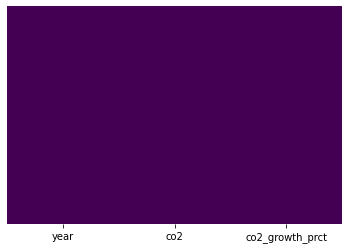

In [ ]:
#Data Visualization starts here
#use a sb heatmap to show correlation visually
#To check correlation in columns

sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

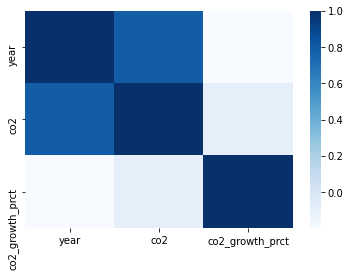

In [ ]:
#To check correlation

plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),cmap='Blues',annot=False) 

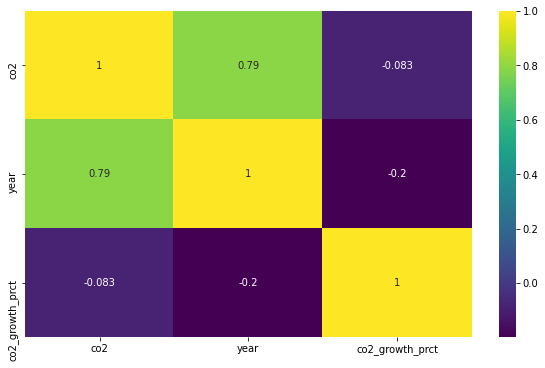

In [ ]:
#Columns correlation matrix
k = 3 #number of variables for heatmap
cols = df.corr().nlargest(k, 'co2')['co2'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [ ]:
# to ignore warnings!
import warnings
warnings.filterwarnings('ignore')

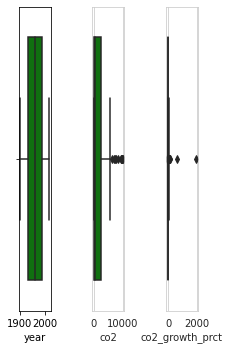

In [ ]:
#To check Outliers

l = df.columns.values
number_of_columns=3
number_of_columns=int(np.ceil(np.sqrt(len("year', 'co2', 'co2_growth_prct")))) # convert float value into int 

number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='green',orient='v')
    plt.tight_layout()

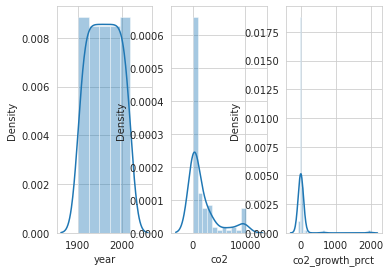

In [ ]:
#To check distribution-Skewness

l = df.columns.values
number_of_columns=3
number_of_columns=int(np.ceil(np.sqrt(len("year', 'co2', 'co2_growth_prct")))) # convert float value into int 

plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True) 

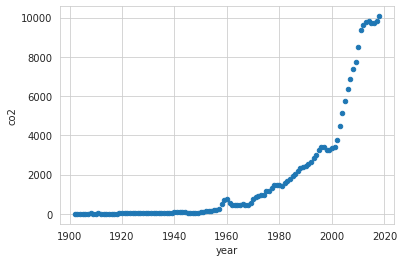

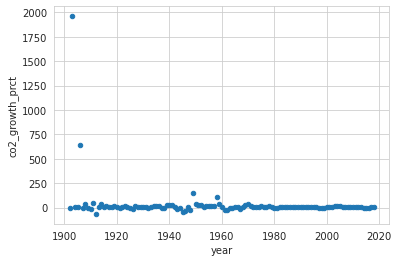

In [ ]:
#Scatter plot
#plot the scatter plot of co2 and co2 growth % variable in data
#plt.scatter(df.co2,df.co2_growth_prct)
#plt.show()

#plot the scatter plot of balance and age variable in data
df.plot.scatter(x="year",y="co2")
plt.show()

#plot the scatter plot of balance and age variable in data
df.plot.scatter(x="year",y="co2_growth_prct")
plt.show()

In [ ]:
df.head()

,year,co2,co2_growth_prct
149,1902,0.095,0.000
150,1903,1.964,1961.538
151,1904,2.088,6.343
152,1905,2.297,10.000
153,1906,17.111,644.817


End of EDA here - AAshna's code ends here

Naveen's code ahead 

In [ ]:
#plotting regression line for scatter plots
x=[]
y=[]
x=df['year'].to_numpy()
y=df['co2'].to_numpy()
X = df.iloc[:, 1:2].values
y1=df['co2_growth_prct'].to_numpy()

  


Estimated coefficients:
b_0 = -127261.4302050189   
b_1 = 65.84592892895174
RMSE VALUE is 1705.0661924295737


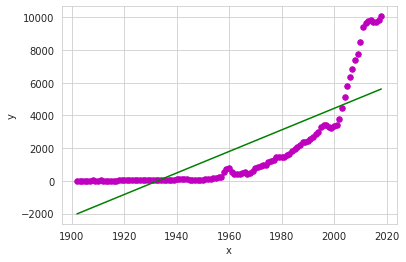

Estimated coefficients:
b_0 = 2211.1590251914536   
b_1 = -1.1127931708852263
RMSE VALUE is 186.19240077291803


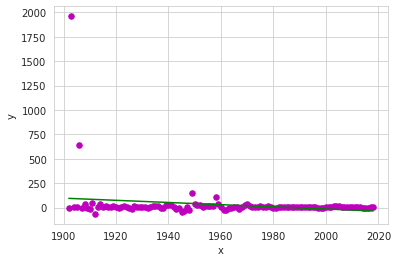

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import metrics
import math
import sklearn
  
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 
  
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 
  
    # function to show plot 
    plt.show() 
    
def rmse(b,y):
    predict=[]
    for i in range(0,117):
        predict.append(b[0]+b[1]*x[i])
    predict=np.array(predict)
    mse = sklearn.metrics.mean_squared_error(y, predict)
    return(math.sqrt(mse))

  
def main(x,y): 
    # observatio # estimating coefficients 
    b = estimate_coef(x, y) 
    print("Estimated coefficients:\nb_0 = {}   \nb_1 = {}".format(b[0], b[1])) 
  
    # plotting regression line 
    print("RMSE VALUE is",rmse(b,y))
    plot_regression_line(x, y, b)
    
if __name__ == "__main__": 
         main(x,y)
         main(x,y1)
    

Estimated coefficients:
b_0 = -127261.4302050189   
b_1 = 65.84592892895174
RMSE VALUE is 1705.0661924295737


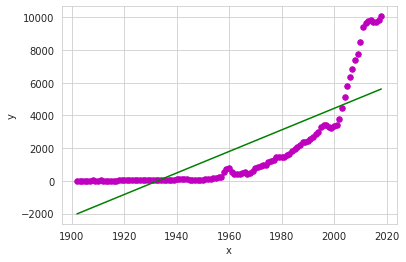

Estimated coefficients:
b_0 = 2211.1590251914536   
b_1 = -1.1127931708852263
RMSE VALUE is 186.19240077291803


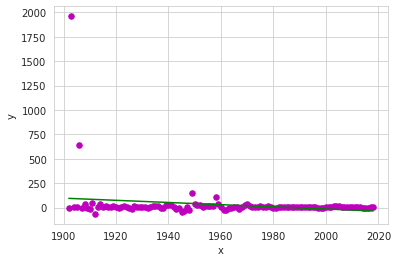

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import metrics
import math
import sklearn
  
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 
  
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 
  
    # function to show plot 
    plt.show() 
    
def rmse(b,y):
    predict=[]
    for i in range(0,117):
        predict.append(b[0]+b[1]*x[i])
    predict=np.array(predict)
    mse = sklearn.metrics.mean_squared_error(y, predict)
    return(math.sqrt(mse))

  
def main(x,y): 
    # observatio # estimating coefficients 
    b = estimate_coef(x, y) 
    print("Estimated coefficients:\nb_0 = {}   \nb_1 = {}".format(b[0], b[1])) 
  
    # plotting regression line 
    print("RMSE VALUE is",rmse(b,y))
    plot_regression_line(x, y, b)
    
if __name__ == "__main__": 
    main(x,y)
    main(x,y1)
    

RMSE VALUE BY polynomial METHOD CO2 0.12246948159522618


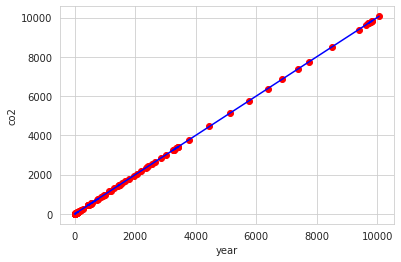

In [ ]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

polynomial_features= PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(X)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(sklearn.metrics.mean_squared_error(y,y_poly_pred))

print("RMSE VALUE BY polynomial METHOD CO2",rmse)
# Visualizing the Polymonial Regression results
def viz_polymonial(Y):
    plt.scatter(X,Y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.xlabel('year')
    plt.ylabel('co2')
    plt.show()
    return
viz_polymonial(y)

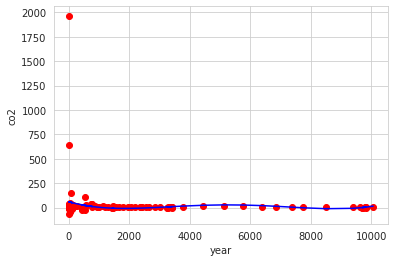

RMSE VALUE BY Polynomial METHOD CO2 growth : 188.16690624817068


In [ ]:
from sklearn.metrics import mean_squared_error
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y1)

# Visualizing the Polymonial Regression results
viz_polymonial(y1)


polynomial_features= PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(X)

model = LinearRegression()
model.fit(x_poly, y1)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y1,y_poly_pred))

print("RMSE VALUE BY Polynomial METHOD CO2 growth :",rmse)

In [ ]:
log_x_data = np.log(x)
log_y_data = np.log(y)

curve_fit = np.polyfit(x, log_y_data, 1)
print(curve_fit)

[ 6.85391348e-02 -1.28668223e+02]


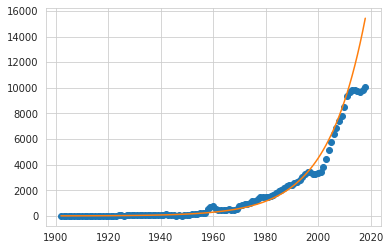

In [ ]:
ye = np.exp(-1.28668223e+02) * np.exp(6.85391348e-02*x)
plt.plot(x, y, "o")
plt.plot(x, ye)